In [1]:
import networkx
import random
import matplotlib.pyplot as plt
import math

In [822]:
# BASIC SIMULATION: New implementation
def SIS_simulation(graph, v, d):
    totalInfected = 500
    infected = {}
    spread = {}
    
    for node in graph.nodes():
        infected[node] = False
    
    i = 0
    while i < 500:
        infectedNode = random.choice(graph.nodes())
        if infected[infectedNode] is True:
            continue
        infected[infectedNode] = True
        i += 1 
    
    totalNodes = graph.number_of_nodes()    
    # determine the number of infected nodes after timestep t
    # infect a node if it has an infected neighbor instead of infecting all neighbors of an infected node 
    for t in range(10000):
        # get density of infection over time
        spread[t] = totalInfected / totalNodes
        node = random.choice(graph.nodes())
        if infected[node]:
            for neighbor in graph.neighbors(node):
                # infects a neighbor of an infected node with probability v
                if random.random() < v and infected[neighbor] is False:
                    infected[neighbor] = True
                    totalInfected += 1
            if random.random() < d:
                infected[node] = False
                totalInfected -= 1
    return spread

7524


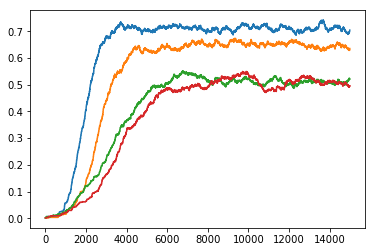

In [433]:
# FIGURE #3
# E-R Graph for use in Simulation
graph = networkx.erdos_renyi_graph(1000, 0.015)
lambdaC = 1 / (graph.number_of_edges() / graph.number_of_nodes())
print(graph.number_of_edges())
# ER density of infected nodes over time in supercritical regime 
# try bigger differences 
#lam0 = lambdaC + 0.002
#lam1 = lambdaC + 0.0016
#lam2 = lambdaC + 0.0012
#lam3 = lambdaC + 0.0007

lam0 = lambdaC + 0.1
lam1 = lambdaC + 0.05
lam2 = lambdaC + 0.005
lam3 = lambdaC + 0.0005

infection0 = SIS_simulation(graph, lam0, 1)
infection1 = SIS_simulation(graph, lam1, 1)
infection2 = SIS_simulation(graph, lam2, 1)
infection3 = SIS_simulation(graph, lam3, 1)
plt.plot(list(infection0.keys()), list(infection0.values()),
         list(infection1.keys()), list(infection1.values()),
         list(infection2.keys()), list(infection2.values()),
         list(infection3.keys()), list(infection3.values()))
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(pow(10, -3), pow(10, -1))
plt.show()

In [203]:
print(lambdaC)

0.13194352816994326


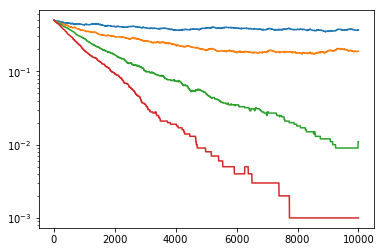

In [319]:
# FIGURE #4
# ER density of infected nodes over time in subcritical regime 
#lam0 = lambdaC - 0.0005
#lam1 = lambdaC - 0.0009
#lam2 = lambdaC - 0.009
#lam3 = lambdaC - 0.03

lam0 = lambdaC - 0.03
lam1 = lambdaC - 0.06
lam2 = lambdaC - 0.09
lam3 = lambdaC - 0.12

infection0 = SIS_simulation__half_infected(graph, lam0, 1)
infection1 = SIS_simulation__half_infected(graph, lam1, 1)
infection2 = SIS_simulation__half_infected(graph, lam2, 1)
infection3 = SIS_simulation__half_infected(graph, lam3, 1)
plt.plot(list(infection0.keys()), list(infection0.values()),
         list(infection1.keys()), list(infection1.values()),
         list(infection2.keys()), list(infection2.values()),
         list(infection3.keys()), list(infection3.values()))
plt.yscale('log')
#plt.ylim(pow(10, -3), pow(10, -1))
plt.show()

In [ ]:
# E-R Surviving Probability
lam0 = lambdaC - 0.03
lam1 = lambdaC - 0.06
lam2 = lambdaC - 0.09
lam3 = lambdaC - 0.12

infection0 = SIS_simulation__half_infected(graph, lam0, 1)
infection1 = SIS_simulation__half_infected(graph, lam1, 1)
infection2 = SIS_simulation__half_infected(graph, lam2, 1)
infection3 = SIS_simulation__half_infected(graph, lam3, 1)
plt.plot(list(infection0.keys()), list(infection0.values()),
         list(infection1.keys()), list(infection1.values()),
         list(infection2.keys()), list(infection2.values()),
         list(infection3.keys()), list(infection3.values()))
#plt.yscale('log')
#plt.ylim(pow(10, -3), pow(10, -1))
plt.show()

6951


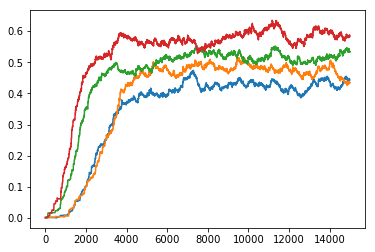

In [421]:
# FIGURE #9 
# B-A Graph for use in Simulation
graph = networkx.barabasi_albert_graph(1000, 7)
print(graph.number_of_edges())
# B-A density of infected nodes over time in supercritical regime (firgure 1) 
lam0 = 0.12
lam1 = 0.14
lam2 = 0.16
lam3 = 0.18

infection0 = SIS_simulation(graph, lam0, 1)
infection1 = SIS_simulation(graph, lam1, 1)
infection2 = SIS_simulation(graph, lam2, 1)
infection3 = SIS_simulation(graph, lam3, 1)
plt.plot(list(infection0.keys()), list(infection0.values()),
         list(infection1.keys()), list(infection1.values()),
         list(infection2.keys()), list(infection2.values()),
         list(infection3.keys()), list(infection3.values()))
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim(pow(10, 2), pow(10, 4))
plt.show()

In [443]:
networkx.barabasi_albert_graph?

In [449]:
# BASIC SIMULATION: New implementation
def SIS_simulation__half_infected(graph, v, d):
    totalInfected = graph.number_of_nodes() / 2
    infected = {}
    spread = {}
    
    for node in graph.nodes():
        infected[node] = False
    
    # p0 = 0.5 --> 500 nodes initially infected in a graph of 1000
    i = 0
    while i < totalInfected:
        infectedNode = random.choice(graph.nodes())
        if infected[infectedNode] is True:
            continue
        infected[infectedNode] = True
        i += 1       
    
    totalNodes = graph.number_of_nodes()    
    # determine the number of infected nodes after timestep t
    # infect a node if it has an infected neighbor instead of infecting all neighbors of an infected node 
    for t in range(10000):
        # get density of infection over time
        spread[t] = totalInfected / totalNodes
        node = random.choice(graph.nodes())
        if infected[node]:
            for neighbor in graph.neighbors(node):
                # infects a neighbor of an infected node with probability v
                if random.random() < v and infected[neighbor] is False:
                    infected[neighbor] = True
                    totalInfected += 1
            if random.random() < d:
                infected[node] = False
                totalInfected -= 1
    return spread

0.1335291761249833


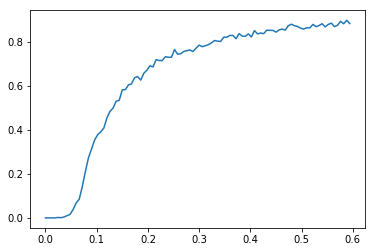

In [311]:
# FIGURE 1: density of infected nodes at the plateau over lambda

# E-R Graph for use in Simulation
ER_graph = networkx.erdos_renyi_graph(1000, 0.015)
print(ER_graph.number_of_nodes() / ER_graph.number_of_edges())
ER_infection = {}

BA_graph = networkx.barabasi_albert_graph(1000, 3)
BA_infection = {}

for lam in range(100):
    ER_infection[lam * 0.006] = SIS_simulation__half_infected(ER_graph, lam * 0.006, 1)[9999]
   # BA_infection[lam * 0.006] = SIS_simulation__half_infected(BA_graph, lam * 0.006, 1)[9999]

plt.plot(list(ER_infection.keys()), list(ER_infection.values()),
         list(BA_infection.keys()), list(BA_infection.values()))
plt.show()

0.13480722566729578


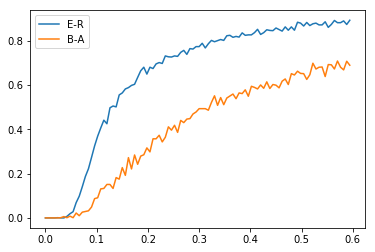

In [512]:
# FIGURE 1: density of infected nodes at the plateau over lambda

# E-R Graph for use in Simulation
ER_graph = networkx.erdos_renyi_graph(1000, 0.015)
print(ER_graph.number_of_nodes() / ER_graph.number_of_edges())
ER_infection = {}

BA_graph = networkx.barabasi_albert_graph(1000, 3)
BA_infection = {}

for lam in range(100):
    ER_infection[lam * 0.006] = SIS_simulation__half_infected(ER_graph, lam * 0.006, 1)[9999]
    BA_infection[lam * 0.006] = SIS_simulation__half_infected(BA_graph, lam * 0.006, 1)[9999]

plt.plot(list(ER_infection.keys()), list(ER_infection.values()),
         list(BA_infection.keys()), list(BA_infection.values()))
plt.legend(['E-R', 'B-A'])
plt.show()

In [511]:
plt.legend?

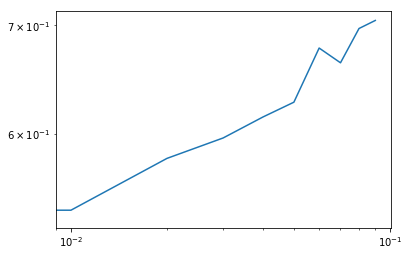

In [442]:
# FIGURE 2: log-log plot of density of infected nodes as a function of lambda - lambdaC
graph = networkx.erdos_renyi_graph(1000, 0.015)
lambdaC = 1 / (graph.number_of_edges() / graph.number_of_nodes())
infection = {}

for i in range(10):
    lam = lambdaC + i * 0.01
    infection[lam - lambdaC] = SIS_simulation__half_infected(graph, lam, 1)[9999]

plt.plot(list(infection.keys()), list(infection.values()))
plt.yscale('log')
plt.xscale('log')
plt.show()

In [389]:
def survivalTime(graph, v, d):
    threshold = 0
    infection = SIS_simulation(graph, v, d)
    for t in range(len(infection.keys())):
        if infection[t] <= threshold:
            return t
    return 11000

In [399]:
# FIGURE 5: Probability of Survival in E-R Networks
# 1. look at how likely it is that an infection survives to time t (either survives or dies)
# 2. run 100 simulations, check the time when they die out
# 3. compute how many simulations made it to a given timestep
# 4. compute fraction of infections that survive until time t --> compute probability from frac
graph = networkx.erdos_renyi_graph(1000, 0.015)
lambdaC = 1 / (graph.number_of_edges() / graph.number_of_nodes())
lam0 = lambdaC - 0.1
lam1 = lambdaC - 0.08
lam2 = lambdaC - 0.06
lam3 = lambdaC - 0.04

infection0 = {}
infection0_freq = {}
infection1 = {}
infection1_freq = {}
infection2 = {}
infection2_freq = {}
infection3 = {}
infection3_freq = {}

# initialize time frequencies
for i in range(10000):
    infection0_freq[i] = 0
    infection1_freq[i] = 0
    infection2_freq[i] = 0
    infection3_freq[i] = 0

In [400]:
# Gets die-out times for 100 simulations at each lambda value
for i in range(100):
    infection0[i] = survivalTime(graph, lam0, 1)
    infection1[i] = survivalTime(graph, lam1, 1)
    infection2[i] = survivalTime(graph, lam2, 1)
    infection3[i] = survivalTime(graph, lam3, 1)
    
# Populates frequency tables for die-out times for each lambda value    
for j in range(10000):
    for k in range(100):
        if infection0[k] > j:
            infection0_freq[j] += 1
        if infection1[k] > j:
            infection1_freq[j] += 1
        if infection2[k] > j:
            infection2_freq[j] += 1
        if infection3[k] > j:
            infection3_freq[j] += 1

    # divide num of times each lambda value gives a certain die-out time by number of simulations (100)
    infection0_freq[j] = infection0_freq[j] / 100
    infection1_freq[j] = infection1_freq[j] / 100
    infection2_freq[j] = infection2_freq[j] / 100
    infection3_freq[j] = infection3_freq[j] / 100

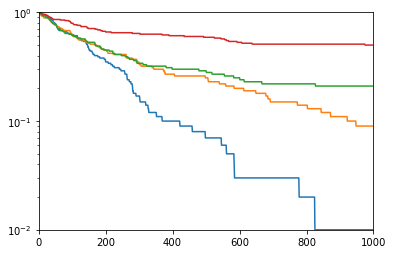

In [405]:
plt.plot(list(infection0_freq.keys()), list(infection0_freq.values()), 
         list(infection1_freq.keys()), list(infection1_freq.values()),
         list(infection2_freq.keys()), list(infection2_freq.values()),
         list(infection3_freq.keys()), list(infection3_freq.values()))
plt.yscale('log')
#plt.xscale('log')
plt.xlim(0, 1000)
plt.ylim(pow(10, -2), pow(10, 0))
plt.show()

In [513]:
# FIGURE 10: Probability of Survival in B-A Networks
# 1. look at how likely it is that an infection survives to time t (either survives or dies)
# 2. run 100 simulations, check the time when they die out
# 3. compute how many simulations made it to a given timestep
# 4. compute fraction of infections that survive until time t --> compute probability from frac
graph0 = networkx.barabasi_albert_graph(1000, 7)
graph1 = networkx.barabasi_albert_graph(2000, 7)
graph2 = networkx.barabasi_albert_graph(3000, 7)
graph3 = networkx.barabasi_albert_graph(4000, 7)

lam = 0.1

infection0 = {}
infection0_freq = {}
infection1 = {}
infection1_freq = {}
infection2 = {}
infection2_freq = {}
infection3 = {}
infection3_freq = {}

# initialize time frequencies
for i in range(10000):
    infection0_freq[i] = 0
    infection1_freq[i] = 0
    infection2_freq[i] = 0
    infection3_freq[i] = 0

In [514]:
# Gets die-out times for 100 simulations for each graph
for i in range(100):
    infection0[i] = survivalTime(graph0, lam, 1)
    infection1[i] = survivalTime(graph1, lam, 1)
    infection2[i] = survivalTime(graph2, lam, 1)
    infection3[i] = survivalTime(graph3, lam, 1)
    
# Populates frequency tables for die-out times for each lambda value    
for j in range(10000):
    for k in range(100):
        if infection0[k] > j:
            infection0_freq[j] += 1
        if infection1[k] > j:
            infection1_freq[j] += 1
        if infection2[k] > j:
            infection2_freq[j] += 1
        if infection3[k] > j:
            infection3_freq[j] += 1

    # divide num of times each lambda value gives a certain die-out time by number of simulations (100)
    infection0_freq[j] = infection0_freq[j] / 100
    infection1_freq[j] = infection1_freq[j] / 100
    infection2_freq[j] = infection2_freq[j] / 100
    infection3_freq[j] = infection3_freq[j] / 100

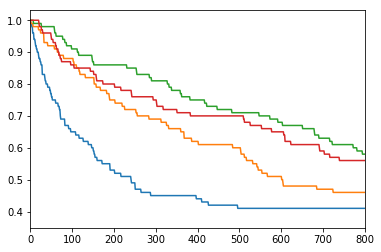

In [516]:
plt.plot(list(infection0_freq.keys()), list(infection0_freq.values()), 
         list(infection1_freq.keys()), list(infection1_freq.values()),
         list(infection2_freq.keys()), list(infection2_freq.values()),
         list(infection3_freq.keys()), list(infection3_freq.values()))
#plt.yscale('log')
#plt.xscale('log')
plt.xlim(0, 800)
#plt.ylim(pow(10, -2), pow(10, 0))
plt.show()

In [ ]:
# FIGURE 6: Inverse Relaxation Time over Lambda


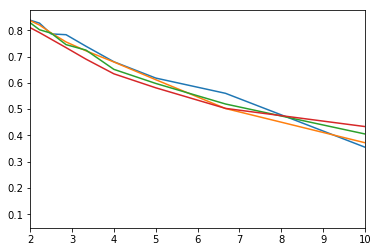

In [458]:
# FIGURE 7: Persistence over inverse lambda
graph0 = networkx.barabasi_albert_graph(1000, 7)
graph1 = networkx.barabasi_albert_graph(5000, 7)
graph2 = networkx.barabasi_albert_graph(10000, 7)
graph3 = networkx.barabasi_albert_graph(15000, 7)
infection0 = {}
infection1 = {}
infection2 = {}
infection3 = {}

for i in range(1, 11):
    lam = i * 0.05
    infection0[1/lam] = SIS_simulation__half_infected(graph0, lam, 1)[9999]
    infection1[1/lam] = SIS_simulation__half_infected(graph1, lam, 1)[9999]
    infection2[1/lam] = SIS_simulation__half_infected(graph2, lam, 1)[9999]
    infection3[1/lam] = SIS_simulation__half_infected(graph3, lam, 1)[9999]

plt.plot(list(infection0.keys()), list(infection0.values()), 
         list(infection1.keys()), list(infection1.values()),
         list(infection2.keys()), list(infection2.values()), 
         list(infection3.keys()), list(infection3.values()))
#plt.yscale('log')
#plt.xscale('log')
plt.xlim(2, 10)
plt.show()

In [761]:
def SIS_simulation__nodes_infected(graph, v, d):
    totalInfected = 1
    infected = {}
    spread = {}
    
    for node in graph.nodes():
        infected[node] = False
    
    i = 0
    while i < 10:
        infectedNode = random.choice(graph.nodes())
        if infected[infectedNode] is True:
            continue
        infected[infectedNode] = True
        i += 1 
    
    totalNodes = graph.number_of_nodes()    
    # determine the number of infected nodes after timestep t
    # infect a node if it has an infected neighbor instead of infecting all neighbors of an infected node 
    for t in range(10000):
        # get density of infection over time
        spread[t] = totalInfected / totalNodes
        node = random.choice(graph.nodes())
        if infected[node]:
            for neighbor in graph.neighbors(node):
                # infects a neighbor of an infected node with probability v
                if random.random() < v and infected[neighbor] is False:
                    infected[neighbor] = True
                    totalInfected += 1
            if random.random() < d:
                infected[node] = False
                totalInfected -= 1
    return infected

171


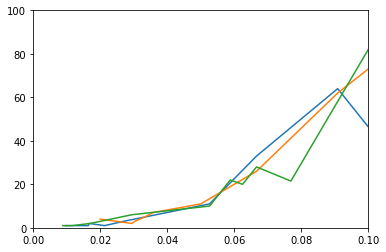

In [807]:
# FIGURE 8: Density of infected nodes (1/pk) over 1/k
# need a list of densities for each node degree present in the network at same time
for i in range(3):
    graph = networkx.barabasi_albert_graph(1000, 7)
    maxDegree = max(graph.degree(graph.nodes()).values())

    lam0 = 0.0065
    lam1 = 0.08
    lam2 = 0.1

    infectionFreqTable = {}
    totalNodesPerDegree = {}
    plot = {}

    for i in range(maxDegree + 1):
        infectionFreqTable[i] = 0
        totalNodesPerDegree[i] = 0

    infectedNodes = {}
    if i == 0:
        infectedNodes = SIS_simulation__nodes_infected(graph, lam0, 1)
    elif i == 1:
        infectedNodes = SIS_simulation__nodes_infected(graph, lam1, 1)
    else:
        infectedNodes = SIS_simulation__nodes_infected(graph, lam2, 1)

    for node in graph.nodes():
        degree = graph.degree(node)
        if infectedNodes[node] is True:
            infectionFreqTable[degree] += 1
        totalNodesPerDegree[degree] += 1

    for i in infectionFreqTable:
        #if i == 0:
        #    plot[i] = 0
        if totalNodesPerDegree[i] != 0:
            infectionFreqTable[i] = infectionFreqTable[i] / totalNodesPerDegree[i]
            if infectionFreqTable[i] != 0:
                plot[1/i] = 1 / infectionFreqTable[i]
        #else: 
        #    plot[1/i] = 0
    
    plt.plot(list(plot.keys()), list(plot.values()))
    plt.xlim(0, 0.1)
    plt.ylim(0, 100)

plt.show()

0.6609385327164574


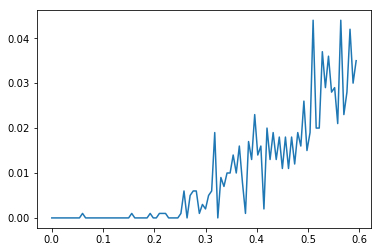

In [833]:
# Scale-Free Out-Degrees Only
# FIGURE 1: density of infected nodes at the plateau over lambda

# E-R Graph for use in Simulation
ER_graph = networkx.directed.scale_free_graph(1000, 1/3, 1/3, 1/3, delta_out=1)
print(ER_graph.number_of_nodes() / ER_graph.number_of_edges())
ER_infection = {}

BA_graph = networkx.barabasi_albert_graph(1000, 3)
BA_infection = {}

for lam in range(100):
    ER_infection[lam * 0.006] = SIS_simulation__half_infected(ER_graph, lam * 0.006, 1)[9999]
    #BA_infection[lam * 0.006] = SIS_simulation__half_infected(BA_graph, lam * 0.006, 1)[9999]

plt.plot(list(ER_infection.keys()), list(ER_infection.values()),
         list(BA_infection.keys()), list(BA_infection.values()))
#plt.legend(['E-R', 'B-A'])
plt.show()

7535


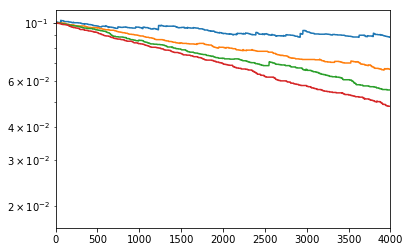

In [839]:
# Out-Degree Scale Free Graph
graph = networkx.scale_free_graph(5000, 1/3, 1/3, 1/3, delta_out=1)
print(graph.number_of_edges())
# B-A density of infected nodes over time in supercritical regime (firgure 1) 
lam0 = 0.5
lam1 = 0.3
lam2 = 0.2
lam3 = 0.1

infection0 = SIS_simulation(graph, lam0, 1)
infection1 = SIS_simulation(graph, lam1, 1)
infection2 = SIS_simulation(graph, lam2, 1)
infection3 = SIS_simulation(graph, lam3, 1)
plt.plot(list(infection0.keys()), list(infection0.values()),
         list(infection1.keys()), list(infection1.values()),
         list(infection2.keys()), list(infection2.values()),
         list(infection3.keys()), list(infection3.values()))
#plt.xscale('log')
plt.yscale('log')
plt.xlim(0, 4000)
plt.show()